In [1]:
from imports import plt, np, pd, rfft, rfftfreq, irfft, lombscargle
import data_processing

2024-03-16 00:27:49.083973: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-16 00:27:49.084023: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-16 00:27:49.085309: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-16 00:27:49.092354: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-16 00:27:49.743472: W tensorflow/compiler/tf2

In [2]:
sunspots = data_processing.read_data()
sunspots

,Greg_Year,Month,Dec_Year,N_total_sunspots_smoothed,Montly_mean_sunspot_number_std,N_obs,Marker
0,1749,1,1749.042,96.7,-1.0,-1,1
1,1749,2,1749.123,104.3,-1.0,-1,1
2,1749,3,1749.204,116.7,-1.0,-1,1
3,1749,4,1749.288,92.8,-1.0,-1,1
4,1749,5,1749.371,141.7,-1.0,-1,1
...,...,...,...,...,...,...,...
3297,2023,10,2023.790,99.4,16.0,958,0
3298,2023,11,2023.873,105.4,16.7,809,0
3299,2023,12,2023.958,114.2,17.9,619,0
3300,2024,1,2024.042,123.0,18.7,783,0


[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Number of sunspots'),
 Text(0.5, 1.0, 'Monthly averaged number of sunspots')]

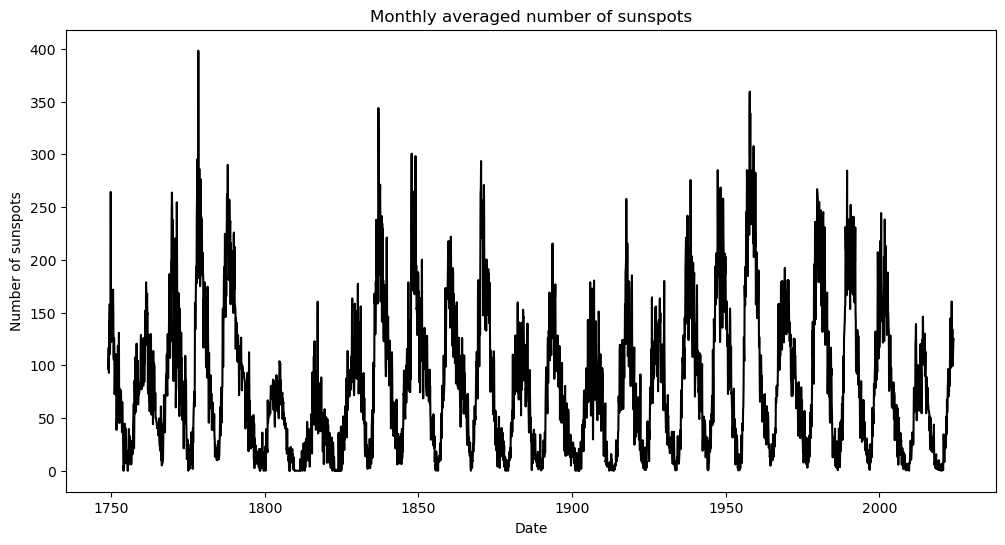

In [3]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(sunspots['Dec_Year'], sunspots['N_total_sunspots_smoothed'], 'k-')
ax.set(
    xlabel='Date',
    ylabel='Number of sunspots',
    title='Monthly averaged number of sunspots',
)

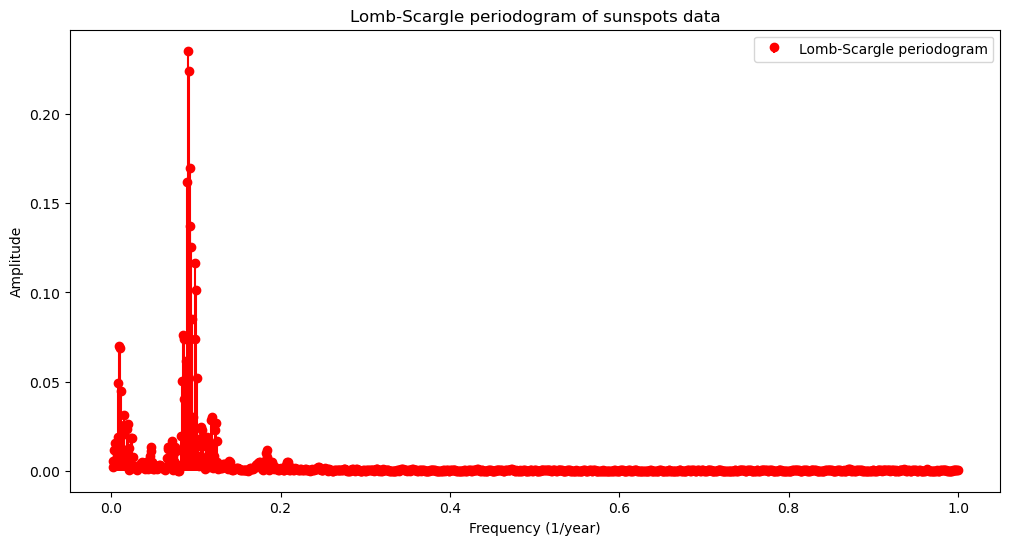

In [34]:
freq_periodogram = np.linspace(0.01, 2*np.pi, 1000)
periodogram = lombscargle(sunspots['Dec_Year']-sunspots['Dec_Year'].iloc[0], 
                    sunspots['N_total_sunspots_smoothed']-np.mean(sunspots['N_total_sunspots_smoothed']), 
                    freq_periodogram, normalize=True)

fig, ax = plt.subplots(figsize=(12, 6))

ax.stem(freq_periodogram/(2*np.pi), periodogram, 'r', label='Lomb-Scargle periodogram', basefmt="none")
ax.set(
    xlabel='Frequency (1/year)',
    ylabel='Amplitude',
    title='Lomb-Scargle periodogram of sunspots data',
)
plt.legend()

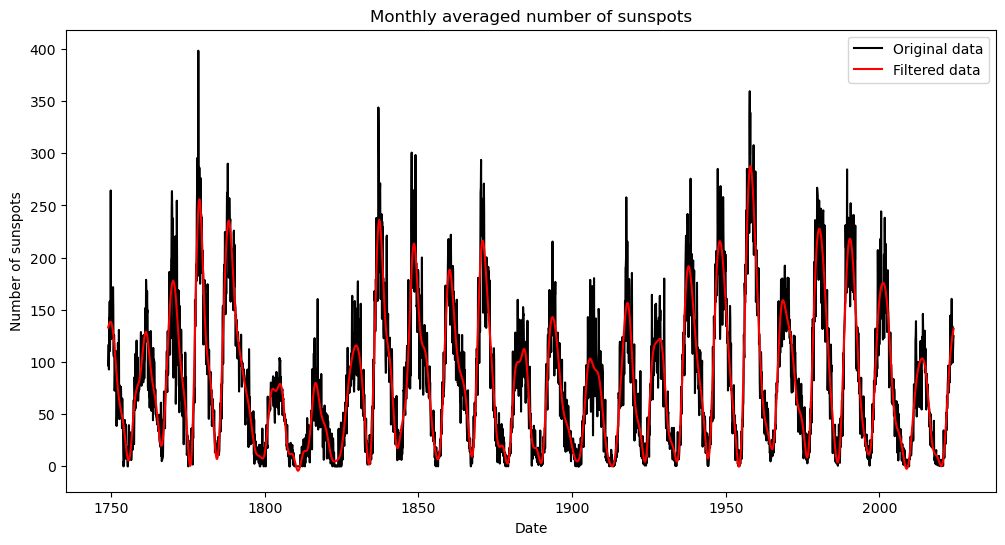

In [39]:
ft = rfft(sunspots["N_total_sunspots_smoothed"].to_numpy())
frequencies = rfftfreq(len(sunspots["N_total_sunspots_smoothed"]), d=sunspots["Dec_Year"].diff().mean())

ft[frequencies>0.3] = 0
sunspots_filtered = irfft(ft)

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(sunspots['Dec_Year'], sunspots['N_total_sunspots_smoothed'], 'k-', label='Original data')
ax.plot(sunspots['Dec_Year'], sunspots_filtered, 'r-', label='Filtered data')
ax.set(
    xlabel='Date',
    ylabel='Number of sunspots',
    title='Monthly averaged number of sunspots',
)
plt.legend()